# Predicting Attachment Style Based on Linguistic Patterns in Messaging Exchanges

### Background
Attachment style, a concept proposed by John Bowlby, describes the dynamics of long-term and short-term interpersonal relationships between humans. There are commonly 4 types of attachment styles, i.e., secure, anxious-preoccupied, fearful-avoidant, and dismissive-avoidant. In some cases, the two avoidant types are combined and are referred to as the avoidant style. 

Depending on how responsive one's parents are, different attachment styles are developed when a person is young. While the original attachment style conceptualized by John Bowlby describes different reaction behaviors in babies when their parents are absent, attachment styles have also been shown to affect various facets of people's lives even after they mature. For example, people who are secure are more likely to disclose information about themselves to others and rely on other people for support [<sup>1</sup>](#fn1). It also affects what people do when they feel anxiety and have the need to reduce anxiety [<sup>2</sup>](#fn2). Recently, a New York Times article by Elizabeth Grace Saunders also illustrated how attachment style can influence one's work-life balance [<sup>3</sup>](#fn3). 

Given the importance of attachment style in one's life, it is useful for people to know what attachment style they have such that they can better understand their behaviors and coping mechanisms in times of stress and anxiety. the current state-of-art assessment for reporting one's attachment style is self-report surveys, consisted of multiple questions ranging from 18 to 45 items. While these reports have been used as the golden standard for attachment style assessment, they take time to complete. Moreover, recent work has revealed biases and inaccuracies in self-report measures [<sup>4</sup>](#fn4). 

In this project, I explore the possibility of using one's messaging patterns to predict their attachment style. The message data were collected from a 2-month long study where participants installed a data collection app on their phones that passively collected data with the participants' permission. As the messaging data was collected in a non-lab environment, this data is more representative of its sender's behaviors. The work is based on the fact that attachment styles manifect in people's reactions to different situations and in their communication with others. By examining linguistic features in people's messages (communication), I hope to predict their attachment styles. 

<span id="fn1">1 Collins,N.L.&Freeney,B.C.(2004). An Attachment Theory Perspective on Closeness and Intimacy. In D.J. Mashek & A. Aron (Eds.), Handbook of Closeness and Intimacy, pp. 163–188. Mahwah, NJ: Lawrence Erlbaum Associates.</span>

<span id="fn2">2 Mikulincer, M.; Shaver, P.R.; Pereg, D. (2003). "Attachment theory and affect regulation: The dynamics, development, and cognitive consequences of attachment-related strategies". Motivation and Emotion. 27 (2): 77–102.</span>

<span id="fn3">3 https://www.nytimes.com/2018/12/19/smarter-living/attachment-styles-work-life-balance.html</span>

<span id="fn4">4 Levine, L. J., & Safer, M. A. (2002). Sources of bias in memory for emotions. Current Directions in Psychological Science, 11(5), 169-173.
    Van de Mortel, T. F. (2008). Faking it: social desirability response bias in self-report research. Australian Journal of Advanced Nursing, The, 25(4), 40.</span>


### Variables
_Outcome Variable_: Attachment style with 3 subscales, i.e., Depend, Close, and Anxiety. They correspond to the 4 types of attachment styles as follows:
- High(close & depend)	&	Low(anxiety):	Secure;
- High(close & depend)	&	High(anxiety):	Anxious-Preoccupied;
- Low(close & depend)	&	Low(anxiety):	Dismissive-Avoidant;
- Low(close & depend)	&	High(anxiety):	fearful-avoidant;

_Predictor Variables_: daily average of the following variables:  
- Sent Message count: how many messages are sent / day;
- Average word count per message;
- Positive emotions: % of words in a message that suggest positive emotions (e.g., good, excellent);
- Intimacy: % of words in a message that fall under the categories of _family, friends, home, sexual, swears, work, leisure, money, body, religion, and health_. Adapted from [<sup>1</sup>](#fn1);
- Extremity in emotions: Sum of positive and negative emotion scores, measuring how extreme one's emotions are in messages;
- Self-disclosure: % of words in a message that suggest disclosing information about self (e.g., emotions, words like "I" etc);

<span id="fn1">1 Gilbert, E., & Karahalios, K. (2009, April). Predicting tie strength with social media. In Proceedings of the SIGCHI conference on human factors in computing systems (pp. 211-220). ACM.</span>

### Hypothesis

- People who evidence a secure attachment style generally hold optimistic views of their relationships and evidence positive views of themselves and others. Therefore, 
  - **positive emotions** will be **negatively** associated with **anxiety** score;
  - **positive emotions** will be **positively** associated with **dependent and close** scores.
- People who evidence a preoccupied (anxious-ambivalent) attachment style express a strong desire for intimacy. Therefore, 
  - **intimacy** will have a **positive** association with **anxiety** score.
- Preoccupied people also report more intense feelings and emotional highs and lows in their romantic relationships. Therefore, 
  - **extremity of positive and negative emotions** will **positively** associate with **anxiety** score;
  - **extremity of positive and negative emotions** will **negatively** associate with **dependent and close** scores.
- People who evidence an avoidant attachment style are less likely to seek intimacy. Therefore, 
  - **intimacy** will have a **negative** association with **depend and close** score.
- People who evidence an avoidant attachment style are less likely to disclose personal information. Therefore, 
  - **self-disclosre** will be **negatively** associated with **depend and close** score.
- As anxious people are more likely to seek out confirmation, 
  - **message count** and **average word count per message** will be positively associated with **anxiety** score.
- As avoident people are more likely to avoid contact with others, 
  - **message count** and **average word count per message** will be negatively associated with **depend and close** scores.


In a linear regression form, the hypotheses above can be formulated as:

$ Anxiety = \beta_{0} + \beta_{1}\times PosEmo + \beta_{2}\times Intimacy + \beta_{3}\times PosNegExtreme + \beta_{4}\times MsgCount + \beta_{5}\times AvgWordPerMsg$ where $\beta_{1}<0$, $\beta_{2}>0$, $\beta_{3}>0$, $\beta_{4}>0$ & $\beta_{5}>0$

$ Depend \& Close = \beta_{0} + \beta_{1}\times PosEmo + \beta_{2}\times PosNegExtreme + \beta_{3}\times Intimacy + \beta_{4}\times SelfDisclose + \beta_{5}\times MsgCount + \beta_{6}\times AvgWordPerMsg$ where $\beta_{1}>0$, $\beta_{2}<0$, $\beta_{3}<0$, $\beta_{4}<0$, $\beta_{5}<0$ & $\beta_{6}<0$

### Data Organization
Currently, data are organized in two separate files. One file contains the attachment style scores and the other contains linguistic scores for each message exchanged between the participants and their romantic partners, friends, family members, and others. 

Data cleaning was mainly be done on the second file for messages. First, unrelevant variables was removed to only leave the predictor variables in the file. This data was also aggregated such that each row is a summarized data for a participant (therefore, there will be 24 rows of data). 

Example of the final data table:

In [292]:
head(attachment)
head(msg_data_id)

closeDep,Final.Anxiety,pid,attachType,attachType.factor
1.000000,1.333333,LS011,DismissiveAvoidant,DismissiveAvoidant
3.833333,1.333333,LS020,Secure,Secure
2.583333,3.833333,LS030,FearfulAvoidant,FearfulAvoidant
1.250000,1.666667,LS031,DismissiveAvoidant,DismissiveAvoidant
2.166667,2.000000,LS040,DismissiveAvoidant,DismissiveAvoidant
3.583333,3.666667,LS050,AnxiousPreoccupied,AnxiousPreoccupied


Id,mean_WC_sent,mean_posemo_sent,mean_negemo_sent,mean_intimacy_sent,mean_selfdisclose_sent,mean_emoextreme_sent,msg_count_sent
P010,5.693702,10.596901,6.1902486,15.708731,25.383379,16.787149,9.769231
P011,7.591327,9.146563,0.8591144,6.098490,14.351438,10.005678,11.142857
P020,2.042381,4.000133,0.0000000,4.190454,8.026248,4.000133,6.200000
P021,3.666667,5.041667,0.8466667,1.976333,9.808167,5.888333,6.333333
P030,7.738135,6.548896,1.6643538,6.184865,15.222065,8.213250,19.090909
P031,6.294617,10.537811,2.1732542,5.360572,15.258178,12.711065,11.222222


In [220]:
install.packages("")
library(dplyr)
library(anytime)
library(ggplot2)
library(caret)
library(pls)
library(boot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [272]:
setwd("/Users/siyanz/GithubProjects/DSPN_S19/Zhao_DSPN_S19/ZHAO_finalProject/")
attachment = read.csv("./data/attachment_score.csv")
study1 = read.csv("./data/LIWC2015_LS1_message_data_final_empath.csv")
study2 = read.csv("./data/LIWC2015_LS2_message_data_final_empath.csv")

In [273]:
# Calculating features
study1$intimacy = study1$family + study1$friend + study1$home + study1$sexual + study1$swear + study1$work + study1$leisure + study1$money + study1$body + study1$relig + study1$health
study2$intimacy = study2$family + study2$friend + study2$home + study2$sexual + study2$swear + study2$work + study2$leisure + study2$money + study2$body + study2$relig + study2$health

study1$selfdisclose = study1$i + study1$we + study1$you + study1$shehe + study1$they + study1$negemo + study1$anx + study1$anger + study1$sad + study1$article
study2$selfdisclose = study2$i + study2$we + study2$you + study2$shehe + study2$they + study2$negemo + study2$anx + study2$anger + study2$sad + study2$article

study1_selectedvars = select(study1, Id, timestamp, sent.received, targetType, WC, posemo, negemo, intimacy, selfdisclose)
study2_selectedvars = select(study2, Id, timestamp, sent.received, targetType, WC, posemo, negemo, intimacy, selfdisclose)

study1_selectedvars$emoextreme = study1_selectedvars$posemo + study1_selectedvars$negemo
study2_selectedvars$emoextreme = study2_selectedvars$posemo + study2_selectedvars$negemo

study1_selectedvars$date = anydate(study1_selectedvars$timestamp/1000)
study2_selectedvars$date = anydate(study2_selectedvars$timestamp/1000)

msg_data <- rbind(study1_selectedvars, study2_selectedvars) 
msg_data_sent <- msg_data[msg_data$sent.received == "sent",]
msg_data_sent <- msg_data_sent[(msg_data_sent$targetType == "partner") | (msg_data_sent$targetType == "family") | (msg_data_sent$targetType == "friend"),]

# Aggregate to participant-day
msg_data_grouped = group_by(msg_data_sent, Id, date)
msg_data_day <- summarise(msg_data_grouped, mean_WC = mean(WC),
                          mean_posemo = mean(posemo),
                          mean_negemo = mean(negemo),
                          mean_intimacy = mean(intimacy),
                          mean_selfdisclose = mean(selfdisclose),
                          mean_emoextreme = mean(emoextreme),
                          msg_count = n()
                         )

# Aggregate to participant
msg_data_grouped_id = group_by(msg_data_day, Id)
msg_data_id = summarise(msg_data_grouped_id, mean_WC_sent = mean(mean_WC),
                          mean_posemo_sent = mean(mean_posemo),
                          mean_negemo_sent = mean(mean_negemo),
                          mean_intimacy_sent = mean(mean_intimacy),
                          mean_selfdisclose_sent = mean(mean_selfdisclose),
                          mean_emoextreme_sent = mean(mean_emoextreme),
                          msg_count_sent = mean(msg_count)
                         )

In [274]:
# Converting attachment scores to categories
attachment$closeDep = 1.0 * (attachment$Final.Depend + attachment$Final.Close)/2

attachment = attachment[ , c("closeDep","Final.Anxiety", "pid")]
attachment$attachType[attachment$closeDep>3 & attachment$Final.Anxiety<=3]<-"Secure"
attachment$attachType[attachment$closeDep>3 & attachment$Final.Anxiety>3]<-"AnxiousPreoccupied"
attachment$attachType[attachment$closeDep<=3 & attachment$Final.Anxiety<=3]<-"DismissiveAvoidant"
attachment$attachType[attachment$closeDep<=3 & attachment$Final.Anxiety>3]<-"FearfulAvoidant"

attachment$attachType.factor <- factor(attachment$attachType)

In [275]:
# Append attachment score to msg data
all_data = merge(msg_data_id, attachment, by.x="Id", by.y="pid")
# head(all_data)

#### Getting to know the data

Most independent variables are normally distribed. But Word Count and Message Count seems to have one-two points that may have higher than average leverage.

However, the dependent variables do not normally distributed. This is a violation of linear regression models. Non-parametric models should be considered for analyses.

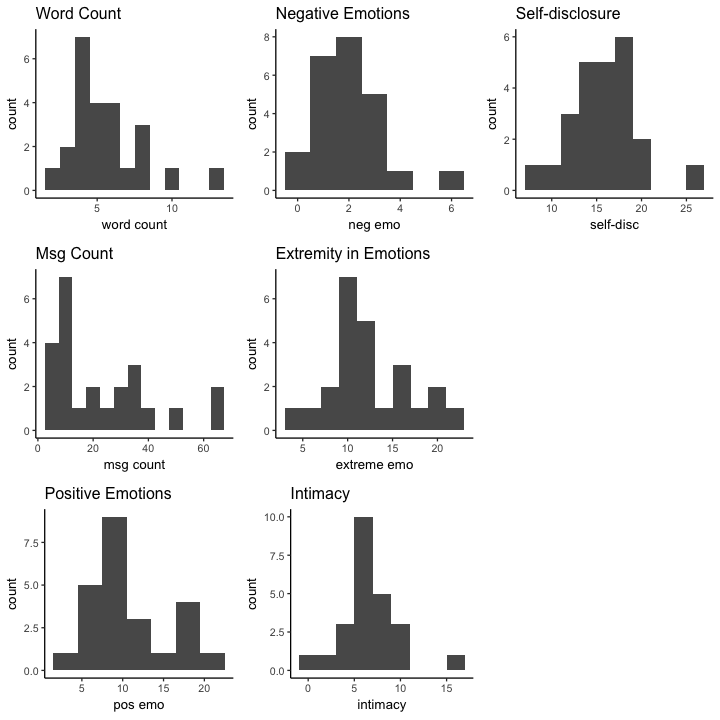

In [333]:
# par(mfrow=c(3,3))
options(repr.plot.width = 6, repr.plot.height = 6)
theme_set(theme_classic(base_size = 8))

p1 = ggplot(all_data, aes(x=mean_WC_sent)) + geom_histogram(binwidth = 1) + ggtitle("Word Count") + xlab("word count")
p2 = ggplot(all_data, aes(x=msg_count_sent)) + geom_histogram(binwidth = 5) + ggtitle("Msg Count") + xlab("msg count")
p3 = ggplot(all_data, aes(x=mean_posemo_sent)) + geom_histogram(binwidth = 3) + ggtitle("Positive Emotions") + xlab("pos emo")
p4 = ggplot(all_data, aes(x=mean_negemo_sent)) + geom_histogram(binwidth = 1) + ggtitle("Negative Emotions") + xlab("neg emo")
p5 = ggplot(all_data, aes(x=mean_emoextreme_sent)) + geom_histogram(binwidth = 2) + ggtitle("Extremity in Emotions") + xlab("extreme emo")
p6 = ggplot(all_data, aes(x=mean_intimacy_sent)) + geom_histogram(binwidth = 2) + ggtitle("Intimacy") + xlab("intimacy")
p7 = ggplot(all_data, aes(x=mean_selfdisclose_sent)) + geom_histogram(binwidth = 2) + ggtitle("Self-disclosure") + xlab("self-disc")

multiplot(p1, p2, p3, p4, p5, p6, p7, cols=3)

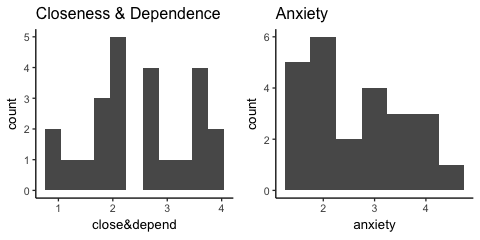

In [337]:
options(repr.plot.width = 4, repr.plot.height = 2)
p1 = ggplot(all_data, aes(x=closeDep)) + geom_histogram(binwidth = 0.3) + ggtitle("Closeness & Dependence") + xlab("close&depend")
p2 = ggplot(all_data, aes(x=Final.Anxiety)) + geom_histogram(binwidth = 0.5) + ggtitle("Anxiety") + xlab("anxiety")
multiplot(p1, p2, cols=2)


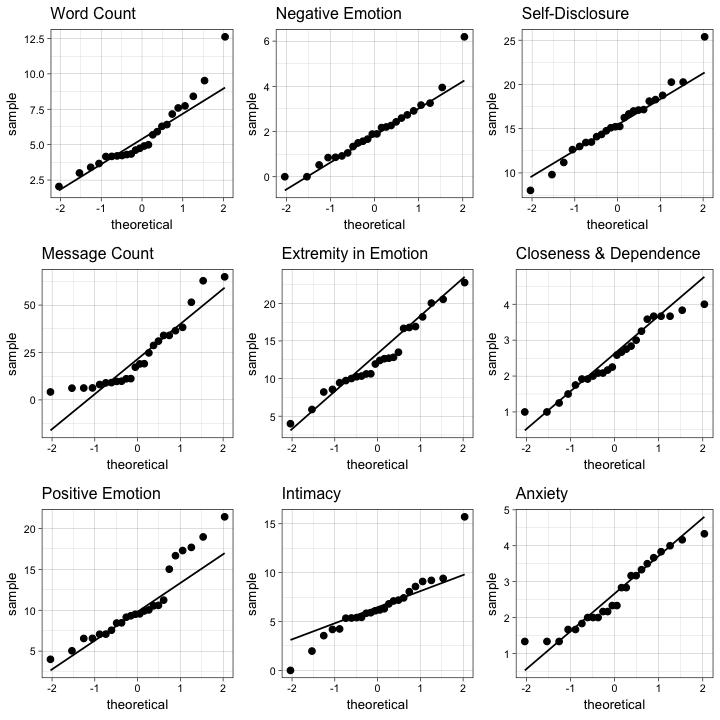

In [354]:
theme_set(theme_linedraw(base_size = 8))
options(repr.plot.width = 6, repr.plot.height = 6)

p1 = ggplot(all_data, aes(sample = closeDep)) + stat_qq() + stat_qq_line() + ggtitle("Closeness & Dependence")
p2 = ggplot(all_data, aes(sample = Final.Anxiety)) + stat_qq() + stat_qq_line() + ggtitle("Anxiety")
p3 = ggplot(all_data, aes(sample = mean_WC_sent)) + stat_qq() + stat_qq_line() + ggtitle("Word Count")
p4 = ggplot(all_data, aes(sample = msg_count_sent)) + stat_qq() + stat_qq_line() + ggtitle("Message Count")# + theme(legend.position = "none")
p5 = ggplot(all_data, aes(sample = mean_posemo_sent)) + stat_qq() + stat_qq_line() + ggtitle("Positive Emotion")
p6 = ggplot(all_data, aes(sample = mean_negemo_sent)) + stat_qq() + stat_qq_line() + ggtitle("Negative Emotion")
p7 = ggplot(all_data, aes(sample = mean_emoextreme_sent)) + stat_qq() + stat_qq_line() + ggtitle("Extremity in Emotion")
p8 = ggplot(all_data, aes(sample = mean_intimacy_sent)) + stat_qq() + stat_qq_line() + ggtitle("Intimacy")
p9 = ggplot(all_data, aes(sample = mean_selfdisclose_sent)) + stat_qq() + stat_qq_line() + ggtitle("Self-Disclosure")

multiplot(p3, p4, p5, p6, p7, p8, p9, p1, p2, cols=3)


While all correlations between IVs and DVs are not strong, there are a few that are stronger than the rest, e.g., anxiety and word count, close&depend and word count, anxiety and self-disclosure.

The correlation plots also show high correlation between postive emotion & extremety in emotions and self-disclose & intimacy. This raises the concern for multi-collinearity.

,mean_WC_sent,mean_posemo_sent,mean_intimacy_sent,mean_selfdisclose_sent,mean_emoextreme_sent,msg_count_sent,closeDep,Final.Anxiety
mean_WC_sent,1.00000000,-0.13766349,0.24381944,0.27676526,-0.09440388,0.15485950,0.32560294,-0.48878275
mean_posemo_sent,-0.13766349,1.00000000,-0.03135592,0.31852787,0.95777469,-0.25241585,-0.19150201,-0.15874098
mean_intimacy_sent,0.24381944,-0.03135592,1.00000000,0.63811962,0.18989942,0.02708671,-0.03530581,-0.05097915
mean_selfdisclose_sent,0.27676526,0.31852787,0.63811962,1.00000000,0.47114788,-0.03959211,0.07710032,-0.26669302
mean_emoextreme_sent,-0.09440388,0.95777469,0.18989942,0.47114788,1.00000000,-0.18132624,-0.13045834,-0.21847809
msg_count_sent,0.15485950,-0.25241585,0.02708671,-0.03959211,-0.18132624,1.00000000,0.11418870,-0.15135569
closeDep,0.32560294,-0.19150201,-0.03530581,0.07710032,-0.13045834,0.11418870,1.00000000,0.07677996
Final.Anxiety,-0.48878275,-0.15874098,-0.05097915,-0.26669302,-0.21847809,-0.15135569,0.07677996,1.00000000


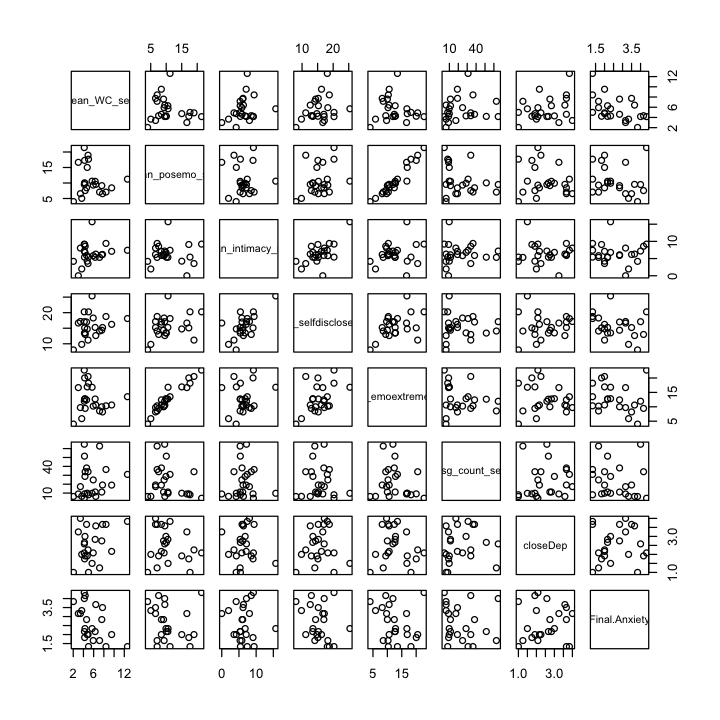

In [355]:
options(repr.plot.width = 6, repr.plot.height = 6)

cor(all_data[, c(-1,-4,-11,-12)])
pairs(all_data[, c(-1,-4,-11,-12)])

### Analysis

#### Inference w/ Bootstrapping
Because there is multi-collinearity between dependent variables and slightly non-normal distribution of attachment scores, I decided to use a non-parametric method to get inference between variables.

(Intercept)           mean_WC_sent       mean_posemo_sent 
           2.199585579            0.140258492           -0.433230377 
    mean_intimacy_sent mean_selfdisclose_sent   mean_emoextreme_sent 
          -0.203173101            0.031621398            0.401701161 
        msg_count_sent 
          -0.005112532


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = all_data, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original       bias    std. error
t1*  2.199585579  0.131086294  1.39100609
t2*  0.140258492 -0.020559640  0.10697988
t3* -0.433230377 -0.035881422  0.25413747
t4* -0.203173101  0.028891114  0.12169748
t5*  0.031621398  0.001950561  0.08372061
t6*  0.401701161  0.019225289  0.24942588
t7* -0.005112532 -0.002318206  0.01455190


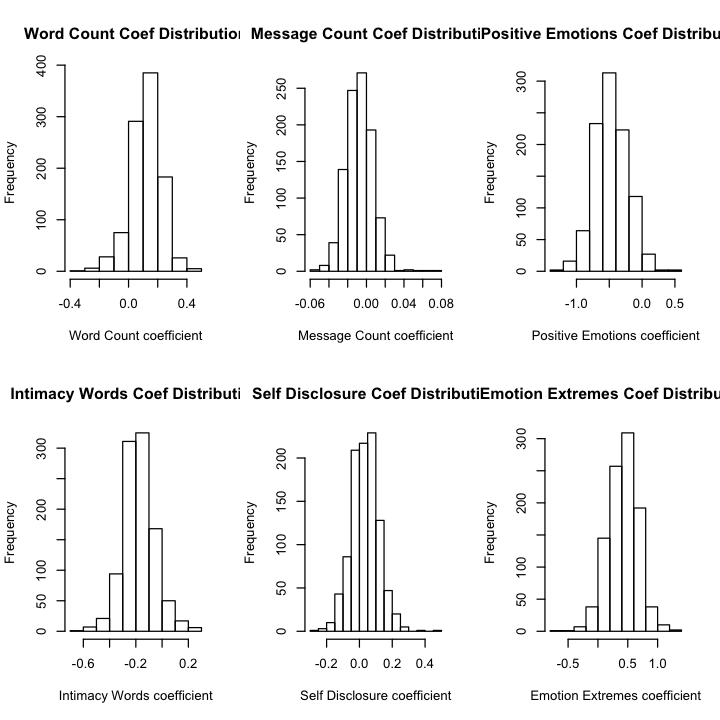

In [356]:
# Close & Dependency Scores

set.seed (1000)
boot.fn = function(data, index)
  # return: throw this as output
  # coef: extract coefficients from model object 
  return(coef(lm(closeDep ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_selfdisclose_sent+mean_emoextreme_sent+msg_count_sent, data=data, subset=index)))

boot.fn(all_data, 1:24)
boot_obj = boot(all_data,boot.fn ,R=1000) #R=repetitions 
print(boot_obj)

par(mfrow=c(2,3))

hist(boot_obj$t[,2], xlab="Word Count coefficient", main="Word Count Coef Distribution")
hist(boot_obj$t[,7], xlab="Message Count coefficient", main="Message Count Coef Distribution")
hist(boot_obj$t[,3], xlab="Positive Emotions coefficient", main="Positive Emotions Coef Distribution")
hist(boot_obj$t[,4], xlab="Intimacy Words coefficient", main="Intimacy Words Coef Distribution")
hist(boot_obj$t[,5], xlab="Self Disclosure coefficient", main="Self Disclosure Coef Distribution")
hist(boot_obj$t[,6], xlab="Emotion Extremes coefficient", main="Emotion Extremes Coef Distribution")

(Intercept)         mean_WC_sent     mean_posemo_sent 
         4.326848865         -0.229498598          0.305035025 
  mean_intimacy_sent mean_emoextreme_sent       msg_count_sent 
         0.151769675         -0.364275223         -0.001394647


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = all_data, statistic = boot.anx.fn, R = 1000)


Bootstrap Statistics :
        original       bias    std. error
t1*  4.326848865  0.143616233  0.72497371
t2* -0.229498598  0.003054855  0.07809735
t3*  0.305035025 -0.029561621  0.26241668
t4*  0.151769675 -0.007342481  0.11623036
t5* -0.364275223  0.016749014  0.24799364
t6* -0.001394647 -0.001946575  0.01195082


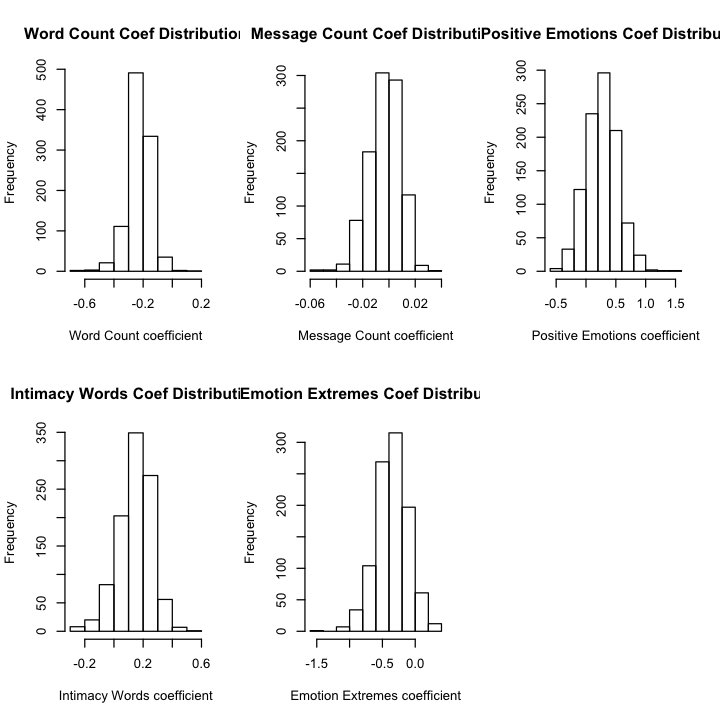

In [285]:
# Anxiety

set.seed (1000)
boot.anx.fn = function(data, index)
  # return: throw this as output
  # coef: extract coefficients from model object 
  return(coef(lm(Final.Anxiety ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_emoextreme_sent+msg_count_sent, data=data, subset=index)))

boot.anx.fn(all_data, 1:24)
boot_anx_obj = boot(all_data,boot.anx.fn ,R=1000) #R=repetitions 
print(boot_anx_obj)

par(mfrow=c(2,3))

hist(boot_anx_obj$t[,2], xlab="Word Count coefficient", main="Word Count Coef Distribution")
hist(boot_anx_obj$t[,6], xlab="Message Count coefficient", main="Message Count Coef Distribution")
hist(boot_anx_obj$t[,3], xlab="Positive Emotions coefficient", main="Positive Emotions Coef Distribution")
hist(boot_anx_obj$t[,4], xlab="Intimacy Words coefficient", main="Intimacy Words Coef Distribution")
hist(boot_anx_obj$t[,5], xlab="Emotion Extremes coefficient", main="Emotion Extremes Coef Distribution")

#### Prediction - OLS

To get a sense of how predictive the IVs are of attachment styles, I constructed predictive models and compare between 2 models: OLS & KNN.

In [286]:
# Splitting data to train and test
set.seed(3456)
trainIndex <- createDataPartition(all_data$closeDep, p = .8, 
                                  list = FALSE)
closeDepTrain <- all_data[ trainIndex,]
closeDepTest  <- all_data[-trainIndex,]

trainIndex_anx <- createDataPartition(all_data$Final.Anxiety, p = .8, 
                                  list = FALSE)
anxTrain <- all_data[ trainIndex,]
anxTest  <- all_data[-trainIndex,]

In [287]:
# Define training control
set.seed(123)
train.control <- trainControl(method = "repeatedcv", 
                              number = 10, repeats = 10)
# Train the model
closeDepLmModel <- train(closeDep ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_selfdisclose_sent+mean_emoextreme_sent+msg_count_sent, data = closeDepTrain, method = "lm",
               trControl = train.control)
# Summarize the results
print(closeDepLmModel)

# prediction on test sample
closeDep_lm_pred <- predict(closeDepLmModel, newdata = closeDepTest)
postResample(pred = closeDep_lm_pred, obs = closeDepTest$closeDep)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Linear Regression 

20 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 18, 18, 18, 18, 18, 18, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  1.139812  1         1.000437

Tuning parameter 'intercept' was held constant at a value of TRUE


RMSE  Rsquared       MAE 
0.9457578 0.8848777 0.8056888

In [288]:
# Define training control
set.seed(123)
train.control <- trainControl(method = "repeatedcv", 
                              number = 10, repeats = 10)
# Train the model
anxLmModel <- train(Final.Anxiety ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_emoextreme_sent+msg_count_sent, data = anxTrain, method = "lm",
               trControl = train.control)
# Summarize the results
print(anxLmModel)

# prediction on test sample
anx_lm_pred <- predict(anxLmModel, newdata = anxTest)
postResample(pred = anx_lm_pred, obs = anxTest$Final.Anxiety)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Linear Regression 

20 samples
 5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 18, 18, 18, 18, 18, 18, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.8129803  1         0.7229274

Tuning parameter 'intercept' was held constant at a value of TRUE


RMSE  Rsquared       MAE 
1.2107294 0.1885116 0.9742872

#### Prediction - KNN

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

RMSE  Rsquared       MAE 
0.8870967 0.6815062 0.7708333

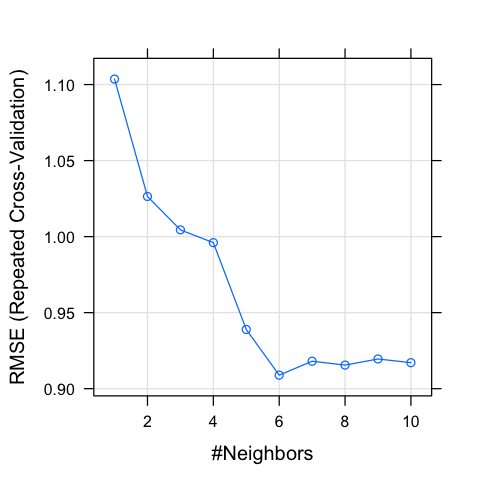

In [353]:
set.seed(123)
options(repr.plot.width = 4, repr.plot.height = 4)

knn_closeDep_mod <- train(closeDep ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_selfdisclose_sent+mean_emoextreme_sent+msg_count_sent, 
             data = closeDepTrain, 
             method = "knn", 
             tuneGrid = expand.grid(k=1:10),
             trControl = trainControl(method = "repeatedcv",
                                      number = 10,
                                      ## repeated ten times
                                      repeats = 10,
                                      savePredictions = T))

plot(knn_closeDep_mod)

closeDep_pred <- predict(knn_closeDep_mod, newdata = closeDepTest)
postResample(pred = closeDep_pred, obs = closeDepTest$closeDep)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

RMSE  Rsquared       MAE 
1.1662532 0.4975743 0.9513889

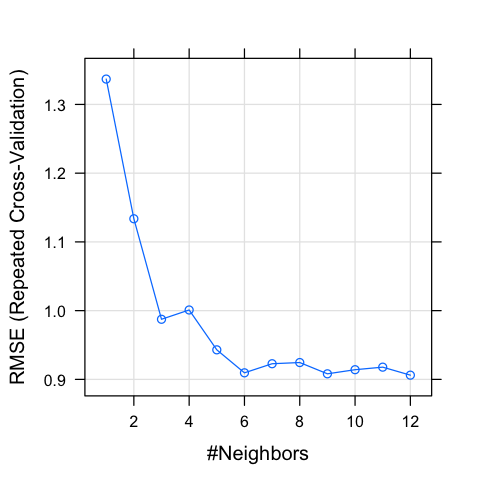

In [290]:
set.seed(123)
knn_anx_mod <- train(Final.Anxiety ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_emoextreme_sent+msg_count_sent, 
             data = anxTrain, 
             method = "knn", 
             tuneGrid = expand.grid(k=1:12),
             trControl = trainControl(method = "repeatedcv",
                                      number = 10,
                                      ## repeated ten times
                                      repeats = 10,
                                      savePredictions = T))

options(repr.plot.width = 4, repr.plot.height = 4)

plot(knn_anx_mod)
anx_pred <- predict(knn_anx_mod, newdata = anxTest)
postResample(pred = anx_pred, obs = anxTest$closeDep)

To take an additional step towards prediction attachment style, I used KNN to predict the 4 categories of styles using the same IVs.

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”

Accuracy     Kappa 
0.6666667 0.4000000

[1] FearfulAvoidant    FearfulAvoidant    DismissiveAvoidant
Levels: AnxiousPreoccupied DismissiveAvoidant FearfulAvoidant Secure

[1] "DismissiveAvoidant" "FearfulAvoidant"    "DismissiveAvoidant"

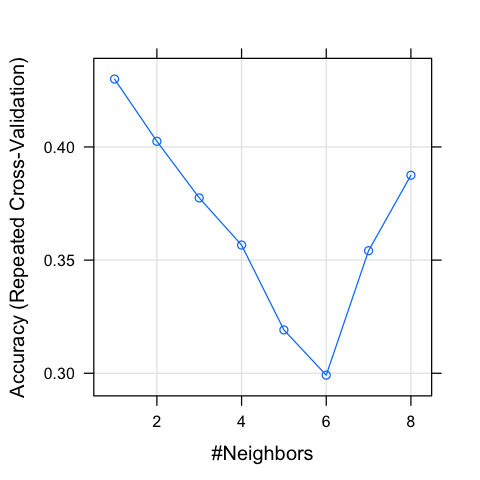

In [291]:
set.seed(123)

# Splitting data to train and test
trainIndex <- createDataPartition(all_data$attachType.factor, p = .8, 
                                  list = FALSE)
attach_train <- all_data[ trainIndex,]
attach_test <- all_data[-trainIndex,]

knn_mod <- train(attachType.factor ~ mean_WC_sent+mean_posemo_sent+mean_intimacy_sent+mean_selfdisclose_sent+mean_emoextreme_sent+msg_count_sent, 
             data = attach_train, 
             method = "knn", 
             tuneGrid = expand.grid(k=1:8),
             trControl = trainControl(method = "repeatedcv",
                                      number = 10,
                                      ## repeated ten times
                                      repeats = 10,
                                      savePredictions = T))

options(repr.plot.width = 4, repr.plot.height = 4)
plot(knn_mod)

attach_pred <- predict(knn_mod, newdata = attach_test)
postResample(pred = attach_pred, obs = attach_test$attachType.factor)

attach_pred
attach_test$attachType

#### Comparisons Between Models
*Close & Depend Score*


| $ $  | $RMSE$ |  $R^2$ |  $MAE$ |
|----|----|----|----|
|  OLS | 0.95 | 0.88 | 0.81 |
| KNN  | 0.89 | 0.68 | 0.77 |

*Anxiety Score*

| $ $  | $RMSE$ |  $R^2$ |  $MAE$ |
|----|----|----|----|
|  OLS | 1.21 | 0.19 | 0.97 |
| KNN  | 1.17 | 0.50 | 0.95 |

*Categorical Attachment Styles*

| $ $   | $Accuracy$ | $Kappa$ |
|-----|----------|-------|
| KNN | 0.67     | 0.40  |

### Conclusions

The goal of the work is to understand how messages are associated with one's attachment style and whether they are predictive of attachment style. The inference model, using bootstraping regression, indicated associations between features extracted from texts sent to family, romantic partner, and friends, and the sender's attachment scores. To my surprise, the direction of associations are opposite to the original hypotheses.

For anxiety scores, positive emotions and intimacy words are **positively** associated with the anxiety element of attachment style while the hypotheses predicted a negative association between positive emotions and anxiety. Extremeties in emotions and average word count permessage are **negatively** associated with anxiety score, also opposite to the hypitheses. The inference model showed a neutral association between sent message count and anxiety score.

For depend and close scores, quantity of positive emotions and intimacy words used in messages are negatively associated with depend&close scores, while extremety in emotions and average word count per message are positively associated with the scores.

While the associations between the DVs and the IVs were not what was hypothesized, both KNN and linear regression models showed these IVs can account for 68% of variance in close and depend score and 50% of anxiety score.

### Helper Functions

In [93]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}